<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Визуализация-данных-в-Python" data-toc-modified-id="Визуализация-данных-в-Python-1">Визуализация данных в Python</a></span><ul class="toc-item"><li><span><a href="#lineplot-–-основы-построения-графиков" data-toc-modified-id="lineplot-–-основы-построения-графиков-1.1"><strong>lineplot</strong> – основы построения графиков</a></span></li><li><span><a href="#subplots-–-cоздаем-систему-графиков" data-toc-modified-id="subplots-–-cоздаем-систему-графиков-1.2"><strong>subplots</strong> – cоздаем систему графиков</a></span></li><li><span><a href="#Анализ-одной-переменной" data-toc-modified-id="Анализ-одной-переменной-1.3">Анализ одной переменной</a></span><ul class="toc-item"><li><span><a href="#histplot,-kdeplot,-boxplot-–-для-непрерывных-переменных" data-toc-modified-id="histplot,-kdeplot,-boxplot-–-для-непрерывных-переменных-1.3.1"><strong>histplot</strong>, <strong>kdeplot</strong>, <strong>boxplot</strong> – для непрерывных переменных</a></span></li><li><span><a href="#countplot---для-частот-категорий" data-toc-modified-id="countplot---для-частот-категорий-1.3.2"><strong>countplot</strong> - для частот категорий</a></span></li></ul></li><li><span><a href="#Анализ-двух-переменных" data-toc-modified-id="Анализ-двух-переменных-1.4">Анализ двух переменных</a></span><ul class="toc-item"><li><span><a href="#barplot-–-среднее/медиана/сумма/итд-в-зависимости-от-категории" data-toc-modified-id="barplot-–-среднее/медиана/сумма/итд-в-зависимости-от-категории-1.4.1"><strong>barplot</strong> – среднее/медиана/сумма/итд в зависимости от категории</a></span></li><li><span><a href="#histplot,-barplot-–-распределение-в-зависимости-от-категории" data-toc-modified-id="histplot,-barplot-–-распределение-в-зависимости-от-категории-1.4.2"><strong>histplot</strong>, <strong>barplot</strong> – распределение в зависимости от категории</a></span></li><li><span><a href="#scatterplot-–-зависимость-между-двумя-непрерывными-переменными" data-toc-modified-id="scatterplot-–-зависимость-между-двумя-непрерывными-переменными-1.4.3"><strong>scatterplot</strong> – зависимость между двумя непрерывными переменными</a></span></li></ul></li><li><span><a href="#Особенности-seaborn" data-toc-modified-id="Особенности-seaborn-1.5">Особенности seaborn</a></span></li></ul></li></ul></div>

# Визуализация данных в Python 

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/visual.png?raw=true" height="400" width="700">
</center>

Представляя информацию в графическом виде, вы **облегчаете процесс восприятия данных**, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных.

Начнем с небольшой "памятки", о которой всегда нужно помнить при создании любых графиков.

**Запрещается делать при работе с визуалом**

1. Оставлять график без названия. По рисунку нельзя понять, какие данные и явления он описывает.
2. Оставлять график без подписи осей.
3. Не указывать единицы измерения.
4. Оставлять размер рисунка дефолтным (по дефолту размер - маленький). Все подписи, описания, легенда, название должны свободно читаться.
5. Пытаться уместить всю информацию на одном графике. Каждому гипотезе/выводу - свой график!
6. Нагромождать график без необходимости фишками, найденными в ответах mail.ru

Основные библиотеки для визуализации в Python - это `matplotlib`, `seaborn`, `plotly`.

**Полезные материалы по правилам оформления графиков**
* [Twenty rules for good graphics](https://robjhyndman.com/hyndsight/graphics/)
* [Много статей и примеров](https://www.darkhorseanalytics.com/blog).

    - [Например](https://www.darkhorseanalytics.com/portfolio/2016/1/7/data-looks-better-naked-clear-off-the-table), как оформлять таблицы с результатами.
    
**Полезные материалы по работе с библиотеками**

* [Руководство по **seaborn**](https://seaborn.pydata.org/tutorial.html)
* [Документация plotly](https://plotly.com/python/)
* [Kaggle COVID19-Explained through Visualizations](https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons?scriptVersionId=36843645)
* [Видео-лекция по визуализации из курса Open Data Science](https://www.youtube.com/watch?v=uwQat1TV0JM)

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

In [2]:
# задаем размер для всех графиков сразу
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,5)

**Продажи и оценки видеоигр**

Работаем с датасетом по продажам и оценкам видео-игр. Датасет взят с [Кеггла](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

__Описание колонок:__
* `Name` $-$ название видеоигры
* `Platform` $-$ платформа, на которой игра была запущена
* `Year_of_Release` $-$ год релиза
* `Genre` $-$ жанр
* `Publisher` $-$ издатель
* `NA_Sales` $-$ объем продаж в Северной Америке (в млн штук)
* `EU_Sales` $-$ объем продаж в Евросоюзе (в млн штук)
* `JP_Sales` $-$ объем продаж в Японии (в млн штук)
* `Other_Sales` $-$ объем продаж в остальном мире (в млн штук)
* `Global_Sales` $-$ общий объем продаж (в млн штук)
* `Critic_Score` $-$ совокупный балл, составленный сотрудниками Metacritic
* `Critic_Count` $-$ кол-во критиков, оцениваемых игру
* `User_Score` $-$ совокупный балл, составленный подписчиками Metacritic (пользователями)
* `User_Count` $-$ кол-во пользователей, оцениваемых игру
* `Developer` $-$ ответственный за создание игры
* `Rating` $-$ рейтинг (Everyone, Teen, Adults Only и тд)

In [5]:
df = pd.read_csv('video_games_sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


В данных много пропусков, поэтому давайте выкинем все пропущенные наблюдения. Также видим, что некоторые колонки pandas привел не к тому типу. Исправим это:

In [5]:
df.shape

(16719, 16)

In [6]:
df = df.dropna()
# df.dropna(inplace=True)

In [7]:
df.shape

(6825, 16)

In [8]:
# поменяяем тип данных у некоторых колонок
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

df['Critic_Score'] = df['Critic_Score'].astype(float)
df['User_Score'] = df['User_Score'].astype(float)

## **lineplot** – основы построения графиков

**Изучаем основы matplotlib на примере линейных графиков**

Самый простой вариант создания графика в matplotlib - функция `plt.plot()`, которой мы передаем два аргумента - что положить на ось _x_, а что на _y_. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot). Можно также менять формат графика

`plt.plot(x, y, fmt)`

In [9]:
x = np.linspace(-3.14, 3.14, 20)
y = np.sin(x)

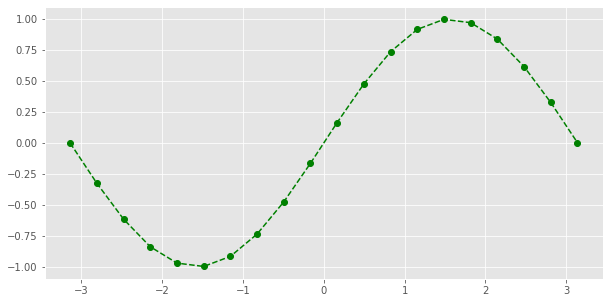

In [10]:
# plt.plot(x, y, 'go--')
plt.plot(x, y, color='green', marker='o', linestyle='dashed')
plt.show()

**Посмотрим на динамику продаж игр в мире по годам:**

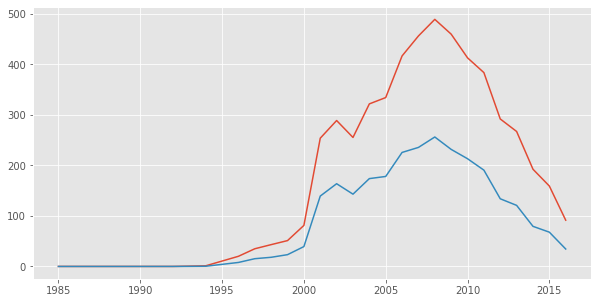

In [11]:
agg = df.groupby('Year_of_Release')['Global_Sales'].sum()
agg2 = df.groupby('Year_of_Release')['NA_Sales'].sum()


# график без сложных модификаций
plt.plot(agg)
plt.plot(agg2);

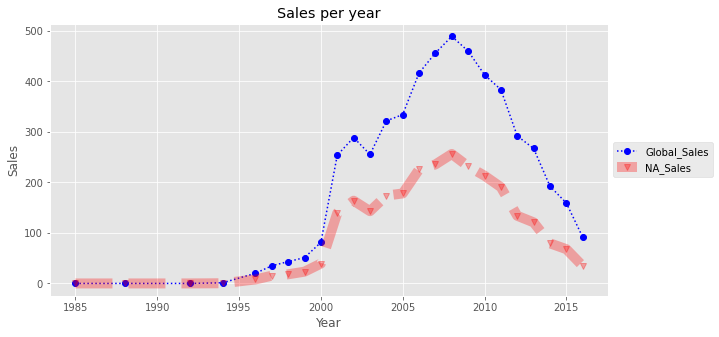

In [12]:
# рисуем 2 линейных графика и настраиваем его
# (!!!) нажмите shift + tab и найдите какие-нибудь интересные аргументы в функции plot
plt.plot(agg, 'bo:', label='Global_Sales')
plt.plot(agg2, color='r', marker='v', linestyle='--', linewidth=10, 
         alpha=0.3,       # прозрачность во всех-всех функциях
         label='NA_Sales' # для легенды
        )

plt.title('Sales per year')   # название графика
plt.ylabel('Sales')           # подпись оси Y
plt.xlabel('Year')            # подпись оси X
# plt.legend(loc='upper left')  # вывели легенду

# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot-in-matplotlib
# можно найти много разных настроек для графика
# запрос: legend outside plot matplotlib
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

plt.show()                    # отображение графика

In [13]:
## можно по-разному передавать данные для построения
# plt.plot(agg.index, agg.values, 'bo:',
#          agg2.index, agg2.values, 'rv--')
# plt.show()

In [14]:
## графики пандаса – надстройка над матплотлиб
# agg.plot()
# agg2.plot()
# plt.show()

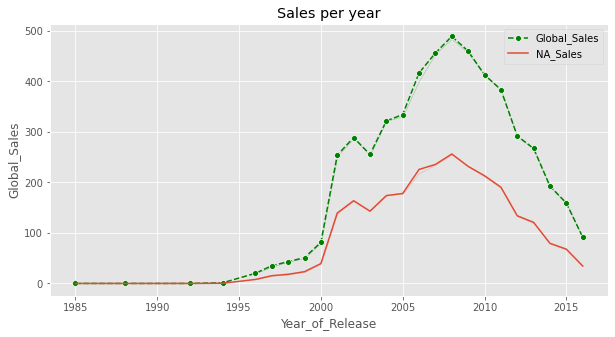

In [15]:
# то же самое через seaborn
# (!!!) нажмите shift + tab и найдите какие-нибудь интересные аргументы в функции lineplot
sns.lineplot(data=df,             # указываем датасет
             x='Year_of_Release', # что будет на оси X
             y='Global_Sales',    # что будет на оси Y
             estimator='sum',     # агрегирующая функция 
                                  # (необязательно указывать, если не нужна агрегация)
             ci=False,            # убираем доверительный интервал
             label='Global_Sales', # для легенды
             color='g', marker='o', ls='--' # это аргументы из plt.plot, 
                                            # в документации sns.lineplot их нет, т.к.
                                            # предполагается, что sns.lineplot - надстройка над plt.plot
            )
# # всё то же самое, но кратко:
sns.lineplot(data=df, x='Year_of_Release', y='NA_Sales', 
             estimator='sum', ci=False, label='NA_Sales')

plt.title('Sales per year')   # название графика
plt.show()                    # отображение графика

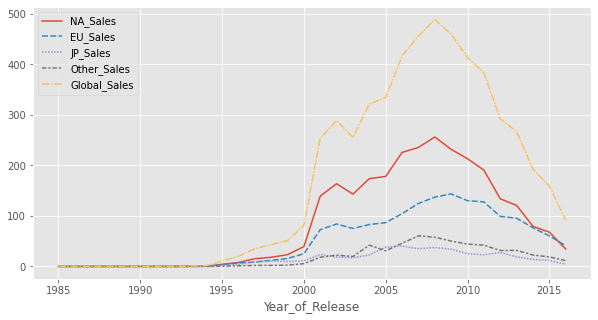

In [16]:
# по аналогии из первого примера с числом полетов
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

sales_cols_ = [x for x in df.columns if 'Sales' in x]
sns.lineplot(data=df.groupby('Year_of_Release')[sales_cols_].sum())
plt.show()

## **subplots** – cоздаем систему графиков

В идеальной вселенной мы создаем графики функцией `subplots`, которая генерирует наш график в 2 переменные (обычно их называют fig и ax):

* `fig` отвечает за график в целом. Воспринимайте ее как файл, который хранит график как картинку.
* `ax` $-$ это ось координат, на которой мы собственно строим график. Все элементы графика хранятся как раз в ней.

**Посмотрим на динамику продаж игр в мире по годам, но теперь используем `subplots`**

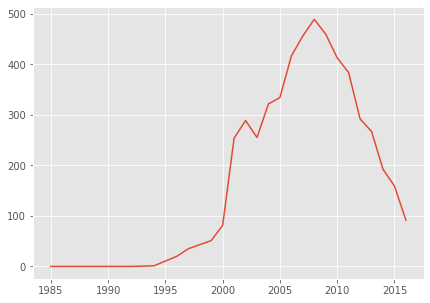

In [17]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создали полоино для графика из 1 ряда и 1 колонки (1 график)
                                           # figsize -это размер нашего прямоугольника в неочевидных единицах. 
                                           # Какой размер удачный? экспериментируйте!
ax.plot(agg)    
plt.show()

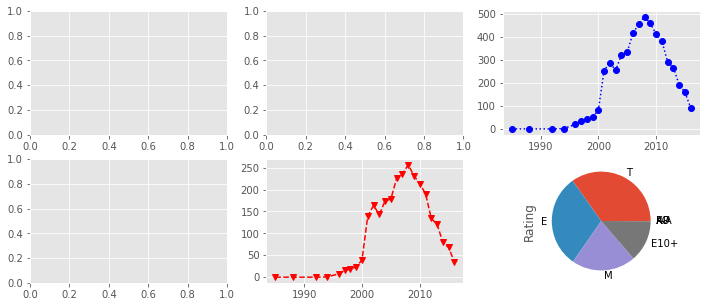

In [18]:
fig, ax = plt.subplots(2,3, figsize=(12,5))


ax[0][2].plot(agg, 'bo:')
ax[1][1].plot(agg2, 'rv--')

# можно поместить пандасовский график в систему графиков
df['Rating'].value_counts().plot(kind='pie', ax=ax[1][2])

plt.show()

Теперь у нас есть 6 графиков! 

Объект _ax_ в данном случае **становится матрицой**. И чтобы обратиться к каждому графику, нужно обратиться к нему по индексу из _ax_.

In [19]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:ylabel='Rating'>]],
      dtype=object)

Ниже посмотрим как с помощью цикла for можно применить какую-то модификацию ко всем графикам системы.

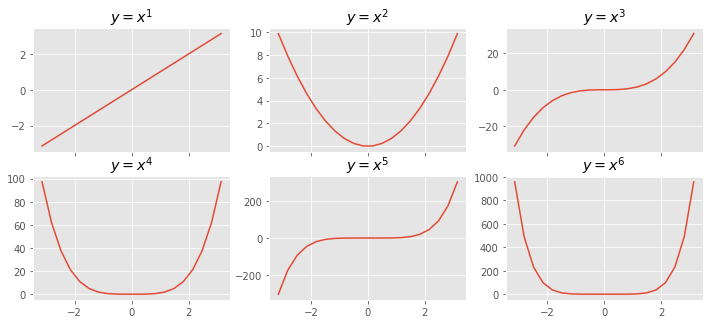

In [20]:
nrows = 2
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize=(12,5), 
                       sharex=True # сделаем общую ось X
                      )
for i in range(nrows):
    for j in range(ncols):
        p = 1 + i*3 + j
        ax[i][j].plot(x, x**p)
        ax[i][j].set_title(f'$y=x^{p}$')
plt.show()

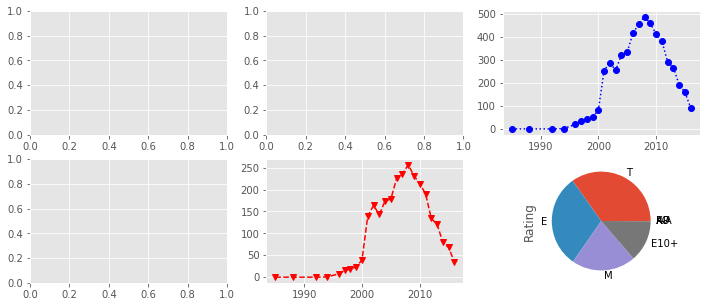

In [21]:
fig, ax = plt.subplots(2,3,figsize=(12,5))
# plt.figure(figsize=(12,5))


# если не хочется думать об индексах, есть функция plt.subplot
plt.subplot(2,3,3) # на 3ий по обычному счет наносим какой-то график
plt.plot(agg, 'bo:')

plt.subplot(2,3,5) # на 5ый по обычному счет наносим какой-то график
plt.plot(agg2, 'rv--')

# можно комбинировать индексацию ax и использование функции plt.subplot
df['Rating'].value_counts().plot(kind='pie', ax=ax[1][2])

plt.show()

## Анализ одной переменной

### **histplot**, **kdeplot**, **boxplot** – для непрерывных переменных

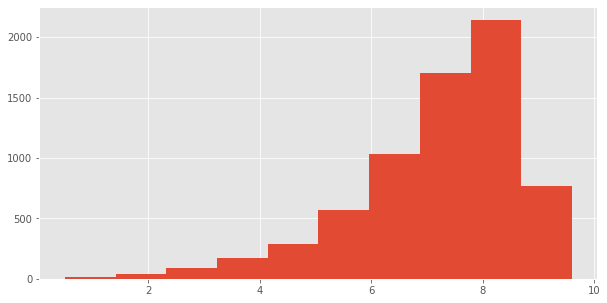

In [22]:
# df['User_Score'].hist(bins=20) # то же самое, но с помощью пандаса
plt.hist(df['User_Score'], bins=10)
plt.show()

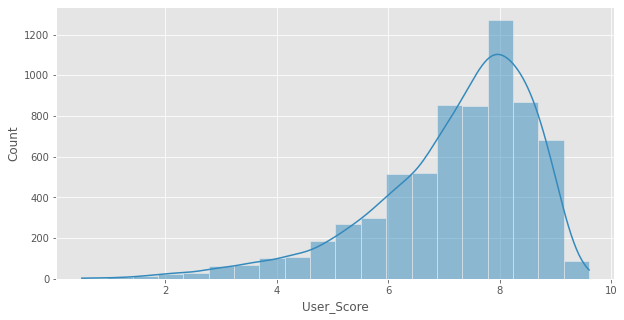

In [23]:
sns.histplot(df['User_Score'], bins=20, 
             kde=True # kernel density estimation - сглаженная линия по гистограмме
            )
plt.show()

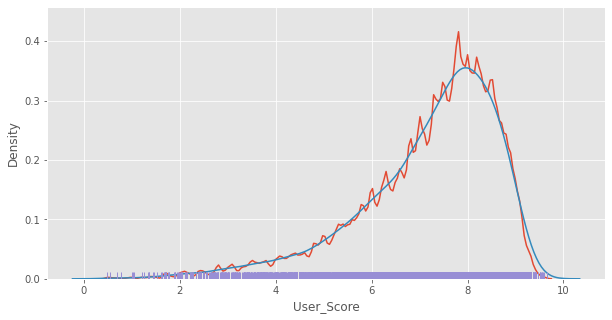

In [24]:
sns.kdeplot(df['User_Score'], bw_adjust=0.2)
sns.kdeplot(df['User_Score'], bw_adjust=1)

noise = np.random.normal(size=df.shape[0])/10
sns.rugplot(df['User_Score']+noise)

plt.show()

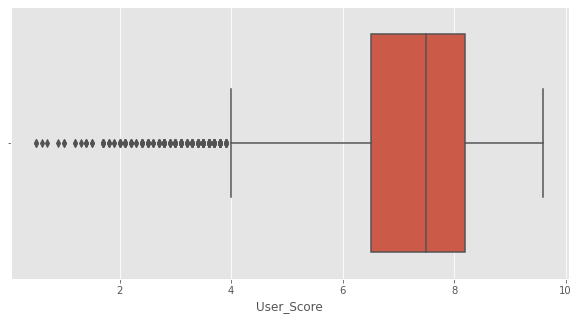

In [25]:
sns.boxplot(data=df, x='User_Score')
plt.show()

### **countplot** - для частот категорий

Посмотрим на кол-во игр в каждом жанре помощью столбчатой диаграммы

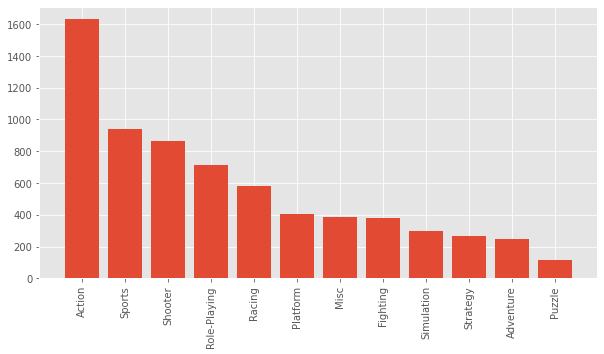

In [26]:
agg = df['Genre'].value_counts()
plt.bar(x=agg.index, height=agg) # примерно то же самое agg.plot(kind='bar');
plt.xticks(rotation=90) # чтоб повернуть названия игр на 90 градусов
plt.show()

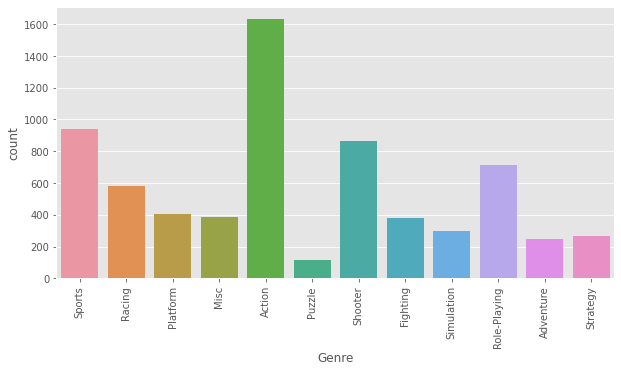

In [27]:
sns.countplot(data=df, x='Genre')
plt.xticks(rotation=90) # чтоб повернуть названия игр на 90 градусов
plt.show()

## Анализ двух переменных

### **barplot** – среднее/медиана/сумма/итд в зависимости от категории

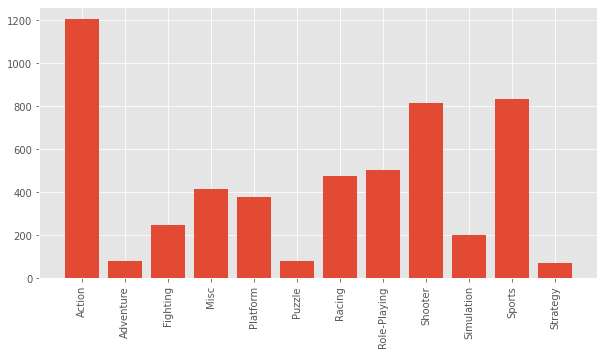

In [28]:
agg = df.groupby('Genre')['Global_Sales'].sum()
plt.bar(x=agg.index, height=agg) # примерно то же самое agg.plot(kind='bar');
plt.xticks(rotation=90) # чтоб повернуть названия игр на 90 градусов
plt.show()

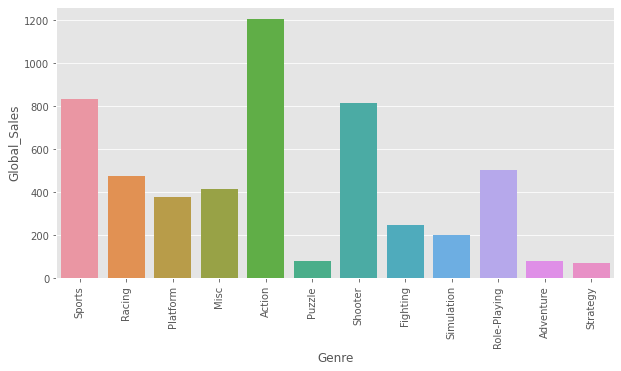

In [29]:
sns.barplot(data=df, x='Genre', y='Global_Sales', estimator=np.sum, ci=None)
plt.xticks(rotation=90) # чтоб повернуть названия игр на 90 градусов
plt.show()

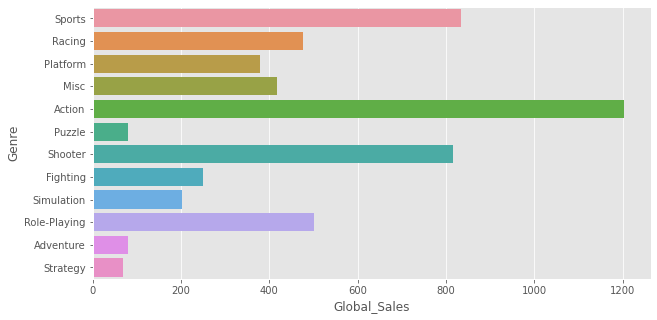

In [30]:
# удобное x и y поменять местами
sns.barplot(data=df, y='Genre', x='Global_Sales', estimator=np.sum, ci=None)
plt.show()

### **histplot**, **barplot** – распределение в зависимости от категории

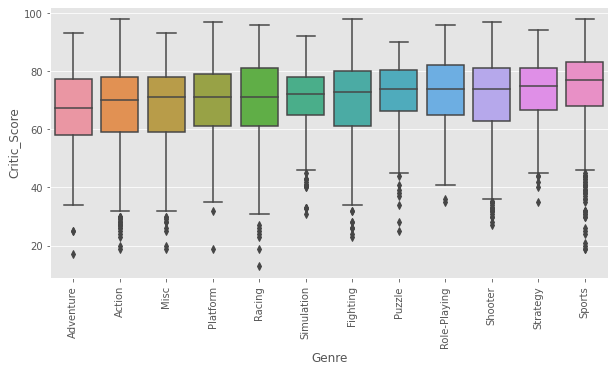

In [31]:
# можно заранее определить порядок появилений боксов на графике
order = df.groupby('Genre')['Critic_Score'].median().sort_values().index

sns.boxplot(data=df, y='Critic_Score', x='Genre', 
            order=order # задаем порядок боксов
           )
plt.xticks(rotation=90) # чтоб повернуть названия игр на 90 градусов
plt.show()

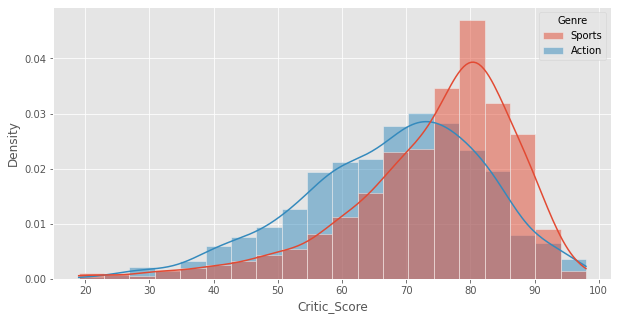

In [32]:
genres_for_analysis = ['Sports','Action']
df_filtered = df[df['Genre'].isin(genres_for_analysis)]

sns.histplot(data=df_filtered, 
             x='Critic_Score', 
             hue='Genre',      # оттенок - то, по какому оттенку мы разграничим распределение
             kde=True,         # сглаживающая линия
             bins=20,          # кол-во бинов всегда стоит настраивать
             stat='density',   # density вместо count
             common_norm=False # убираем общую нормировку, тк игр в Action гораздо больше
            )
plt.show()

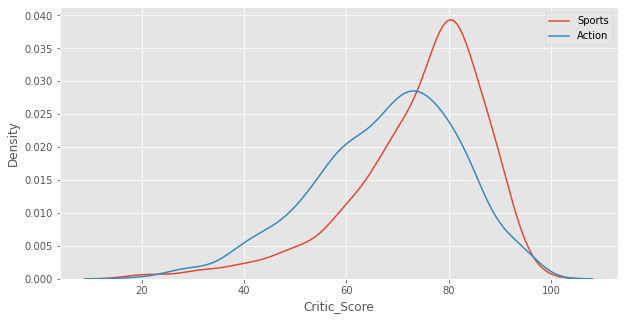

In [33]:
# можно и так это нарисовать
sns.kdeplot(df[df['Genre']=='Sports']['Critic_Score'], label='Sports')
sns.kdeplot(df[df['Genre']=='Action']['Critic_Score'], label='Action')
plt.legend()
plt.show()

### **scatterplot** – зависимость между двумя непрерывными переменными

In [34]:
df['Critic_Score'] = df['Critic_Score']/10

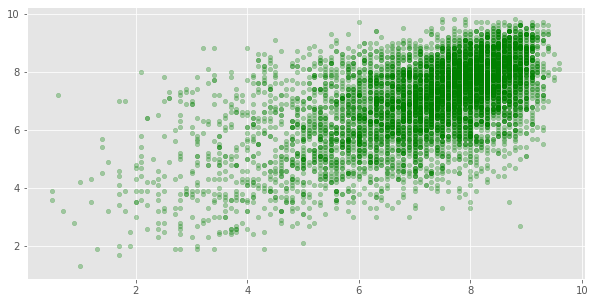

In [35]:
plt.scatter(x=df['User_Score'],  # что на оси X
            y=df['Critic_Score'],# что на оси Y
            s=20,                # размер точек
            c='g',               # цвет
            alpha=0.3,           # прозрачность
           )
plt.show()

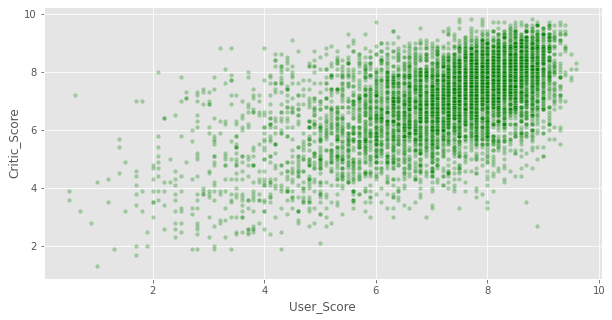

In [36]:
sns.scatterplot(data=df, x='User_Score', y='Critic_Score', 
                s=20, color='g', alpha=0.3 # аргументы из plt.scatter
               )
plt.show()

## Особенности seaborn

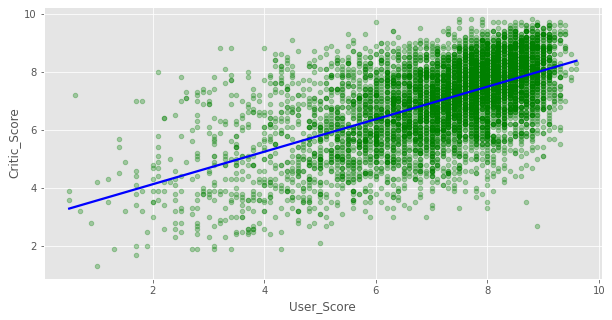

In [37]:
sns.regplot(data=df, x='User_Score', y='Critic_Score', ci=False,
            # передаем доп. аргументы в изначальную функцию plt.scatter
            scatter_kws=dict(s=20, color='g', alpha=0.3),  
            # передаем доп. аргументы в изначальную функцию plt.plot
            line_kws=dict(color='b'),           
           )
plt.show()

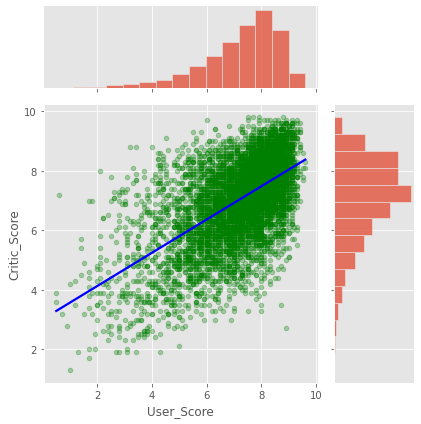

In [38]:
sns.jointplot(data=df, x='User_Score', y='Critic_Score', 
              kind='reg', # попробуйте scatter kde hist
              ratio=3,    # пропорция графика по середине к графикам по бокам
              # параметры гистограммы (сбоку)
              marginal_kws=dict(bins=15, kde=False),
              # параметры диаграммы рассеивания по середине
              joint_kws=dict( # словарь в словаре (внимание!)
                  ci=False,
                  scatter_kws=dict(s=20, color='g', alpha=0.3),
                  line_kws=dict(color='b')
                ),
             )
plt.show()